[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/geo-di-lab/emerge-lessons/blob/main/docs/ch6/lesson2.ipynb)

# Mapping Your Data

This template file shows how you can create maps (static and interactive).

In [ ]:
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
!pip install contextily
import contextily as cx

## Load your data

In Google Colab, click on the folder icon to the left of the screen. If it says "Connecting to a runtime to enable file browsing," you may need to wait a few seconds for Google Colab to connect and load. Click the Upload icon (the left-most icon) and select your file on your computer.

You will see a pop-up that says `Warning: Ensure that your files are saved elsewhere. This runtime's files will be deleted when this runtime is terminated.` This is because, once you upload your data, Google Colab creates a copy of the data in your browser, which will be deleted once you close the browser. The data on your computer will remain the same, and nothing will be changed even if you make edits here in Google Colab.

Here is how to upload your spatial data based on the different file types.

1. Shapefile (.shp):

if you uploaded a zipped shapefile:

```data = gpd.read_file('name_of_your_file.zip')```

or if you uploaded the separate shapefiles (.SHP, .DBF, .SHX, etc.)

```data = gpd.read_file('name_of_your_file.shp')```

2. GeoJSON (.geojson):

```data = gpd.read_file('name_of_your_file.geojson')```

3. Geopackage (.gpkg):

```data = gpd.read_file('name_of_your_file.gpkg', layer='name_of_your_layer')```

4. Geodatabase (.gdb) - must be zipped first:

```data = gpd.read_file('name_of_your_zipped_gdb.zip', layer='name_of_your_layer')```

In [ ]:
# Enter code here
data =

For this example, we'll use the GLOBE Observer Mosquito Habitat Mapper dataset, filtered to Florida:

```
data = gpd.read_file('https://github.com/geo-di-lab/emerge-lessons/raw/refs/heads/main/docs/data/globe_mosquito.zip')
fl = gpd.read_file('https://github.com/geo-di-lab/emerge-lessons/raw/refs/heads/main/docs/data/florida_boundary.geojson')[['geometry']]

data = gpd.sjoin(data, fl, how="inner", predicate='intersects') \
          .drop(columns=['index_right']) \
          .reset_index(drop=True)
```

In [ ]:
# View first 5 rows of the table
data.head()

,CountryCode,CountryName,Elevation,AbdomenCloseupPhotoUrls,BreedingGroundEliminated,Comments,DataSource,ExtraData,Genus,GlobeTeams,...,WaterSourcePhotoUrls,WaterSourceType,OrganizationId,OrganizationName,Protocol,SiteId,SiteName,MeasuredDate,LarvaeCountProcessed,geometry
0,USA,United States,18.6,None,true,"Water is kinda brown and dirty, there are lots...",GLOBE Observer App,LarvaeVisibleNotSure,None,None,...,https://data.globe.gov/system/photos/2024/10/0...,still: lake/pond/swamp,17043304,United States of America Citizen Science,mosquito_habitat_mapper,366553,17RLM547097,2024-10-06,0.0,POINT (-82.47913 28.10484)
1,USA,United States,17.8,None,false,"This water is mostly clear, next to flowing wa...",GLOBE Observer App,LarvaeVisibleYes,None,None,...,https://data.globe.gov/system/photos/2024/10/0...,flowing: still water found next to river or st...,17043304,United States of America Citizen Science,mosquito_habitat_mapper,366554,17RLM547096,2024-10-06,7.0,POINT (-82.47912 28.10394)
2,USA,United States,19.6,None,false,None,GLOBE Observer App,LarvaeVisibleNotSure,None,None,...,https://data.globe.gov/system/photos/2024/10/0...,still: lake/pond/swamp,17043304,United States of America Citizen Science,mosquito_habitat_mapper,366558,17RLM545096,2024-10-06,NaN,POINT (-82.48116 28.10392)
3,USA,United States,1.4,None,false,Brown standing water,GLOBE Observer App,LarvaeVisibleYes,None,None,...,https://data.globe.gov/system/photos/2024/09/1...,still: lake/pond/swamp,17043304,United States of America Citizen Science,mosquito_habitat_mapper,364622,17RLL333667,2024-09-16,80.0,POINT (-82.69086 27.71431)
4,USA,United States,29.5,None,false,None,GLOBE Observer App,LarvaeVisibleNo,None,None,...,None,still: lake/pond/swamp,17043304,United States of America Citizen Science,mosquito_habitat_mapper,348376,17RMM705497,2024-04-09,0.0,POINT (-81.30136 28.47356)


In [ ]:
# View statistics like mean, min, max for each column
data.describe()

,MeasuredAt,MeasurementLatitude,MeasurementLongitude,LarvaeCountProcessed
count,615,615.000000,615.000000,377.000000
mean,2020-11-29 01:34:37.073000,26.873566,-81.030581,6.336870
min,2018-03-17 16:09:00,24.995600,-86.457000,0.000000
25%,2019-08-24 15:33:30,26.339450,-81.943400,0.000000
50%,2020-07-06 20:00:00,26.599800,-80.678600,0.000000
75%,2021-09-15 19:15:00,27.427750,-80.114600,0.000000
max,2024-10-06 20:33:00,30.522400,-80.056200,300.000000
std,NaN,0.928048,1.004293,28.153371


Make a simple map to see the data.

<Axes: >

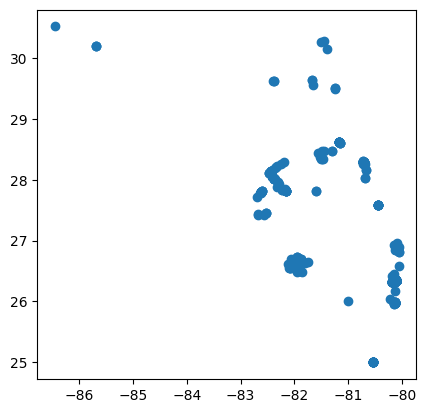

In [ ]:
data.plot()

Add a basemap using [contextily](https://contextily.readthedocs.io/en/latest/).

Note: We use .to_crs(epsg=3857) to set the data to a coordinate reference system that is consistent with the basemap (the map in the background) that we want to add.

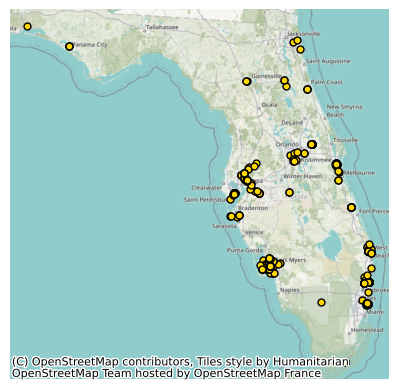

In [ ]:
ax = data.to_crs(epsg=3857).plot(color="gold",        # Name of color for points
                                 edgecolor="black",
                                 markersize=25)
cx.add_basemap(ax)
ax.axis('off')
plt.show()

You can set the color of the points. Here is a list of named colors:
![List of colors](https://matplotlib.org/stable/_images/sphx_glr_named_colors_003_2_00x.png)

## Create an interactive map using [folium](https://python-visualization.github.io/folium/latest/).

### If your dataset is made up of points
For this example, we'll continue using the GLOBE Observer Mosquito Habitat Mapper Florida dataset.

In the code below, you can define "popup_content" which will appear when you click on a point. For example,

```
popup_content = f"""<b>Label1:</b> {row['Column1']}<br>
                    <b>Label2:</b> {row['Column2']}<br>
                    <b>Label3:</b> {row['Column3']}"""
```

In this code, `<b>Name:</b>` indicates that the word "Name:" will be bolded because it is sandwiched between `<b>` and `</b>`. The `<br>` indicates a break, which will put the following text on a new line.

To customize this code, replace Column1, Column2, and Column3 with the exact name of the columns in your dataset. Then, replace Label1, Label2, and Label3 with what you want to appear in the pop-up to describe each column. These labels can be the same as your column names or they can be more descriptive. For example, if your column name is "lat," your label name might be "Latitude."

In [ ]:
# Create empty map zoomed to Florida
map = folium.Map(location=[28.263363, -83.497652], tiles="CartoDB positron", zoom_start=7)

# Add each point as a marker on the map
for idx, row in data.iterrows():
    popup_content = f"""<b>Label1:</b> {row['Column1']}<br>
                        <b>Label2:</b> {row['Column2']}<br>
                        <b>Label3:</b> {row['Column3']}"""
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=folium.Popup(popup_content, max_width=300)
    ).add_to(map)

display(map)

### If your dataset is made up of polygons
For this example, we'll use Florida county boundaries:
```
data = gpd.read_file('https://github.com/geo-di-lab/emerge-lessons/raw/refs/heads/main/docs/data/florida_counties.geojson')
```

In [ ]:
# Write the name of a column from your dataset that you want to appear in the pop-up
column_name = ""

In [ ]:
# Create empty map zoomed to Florida
map = folium.Map(location=[28.263363, -83.497652], tiles="CartoDB positron", zoom_start=7)

# Add each polygon as a marker on the map
for idx, row in data.iterrows():
    # Simplify geometry to make the map load faster
    sim_geo = gpd.GeoSeries(row["geometry"]).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "blue"})
    folium.Popup(row[column_name]).add_to(geo_j)
    geo_j.add_to(map)

display(map)

References:
- [Introduction to GeoPandas](https://geopandas.org/en/stable/getting_started/introduction.html)
- [Plotting polygons with Folium](https://geopandas.org/en/stable/gallery/polygon_plotting_with_folium.html)
- [Introduction guide to contextily](https://contextily.readthedocs.io/en/latest/intro_guide.html)